In [281]:
words = open('input.txt', 'r').read().splitlines()

In [282]:
print("Words:")
print(words[:10])
print(f"Length: {len(words)}")

Words:
['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
Length: 32033


In [283]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [284]:
sorted(b.items(), key=lambda x: -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [285]:
import  torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
N = torch.zeros((27, 27), dtype=torch.float32)

In [286]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+ 1 for i, s in enumerate(chars)}
stoi['.']  = 0
itos = {i : s for s, i in stoi.items()}

In [287]:

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


(-0.5, 26.5, 26.5, -0.5)

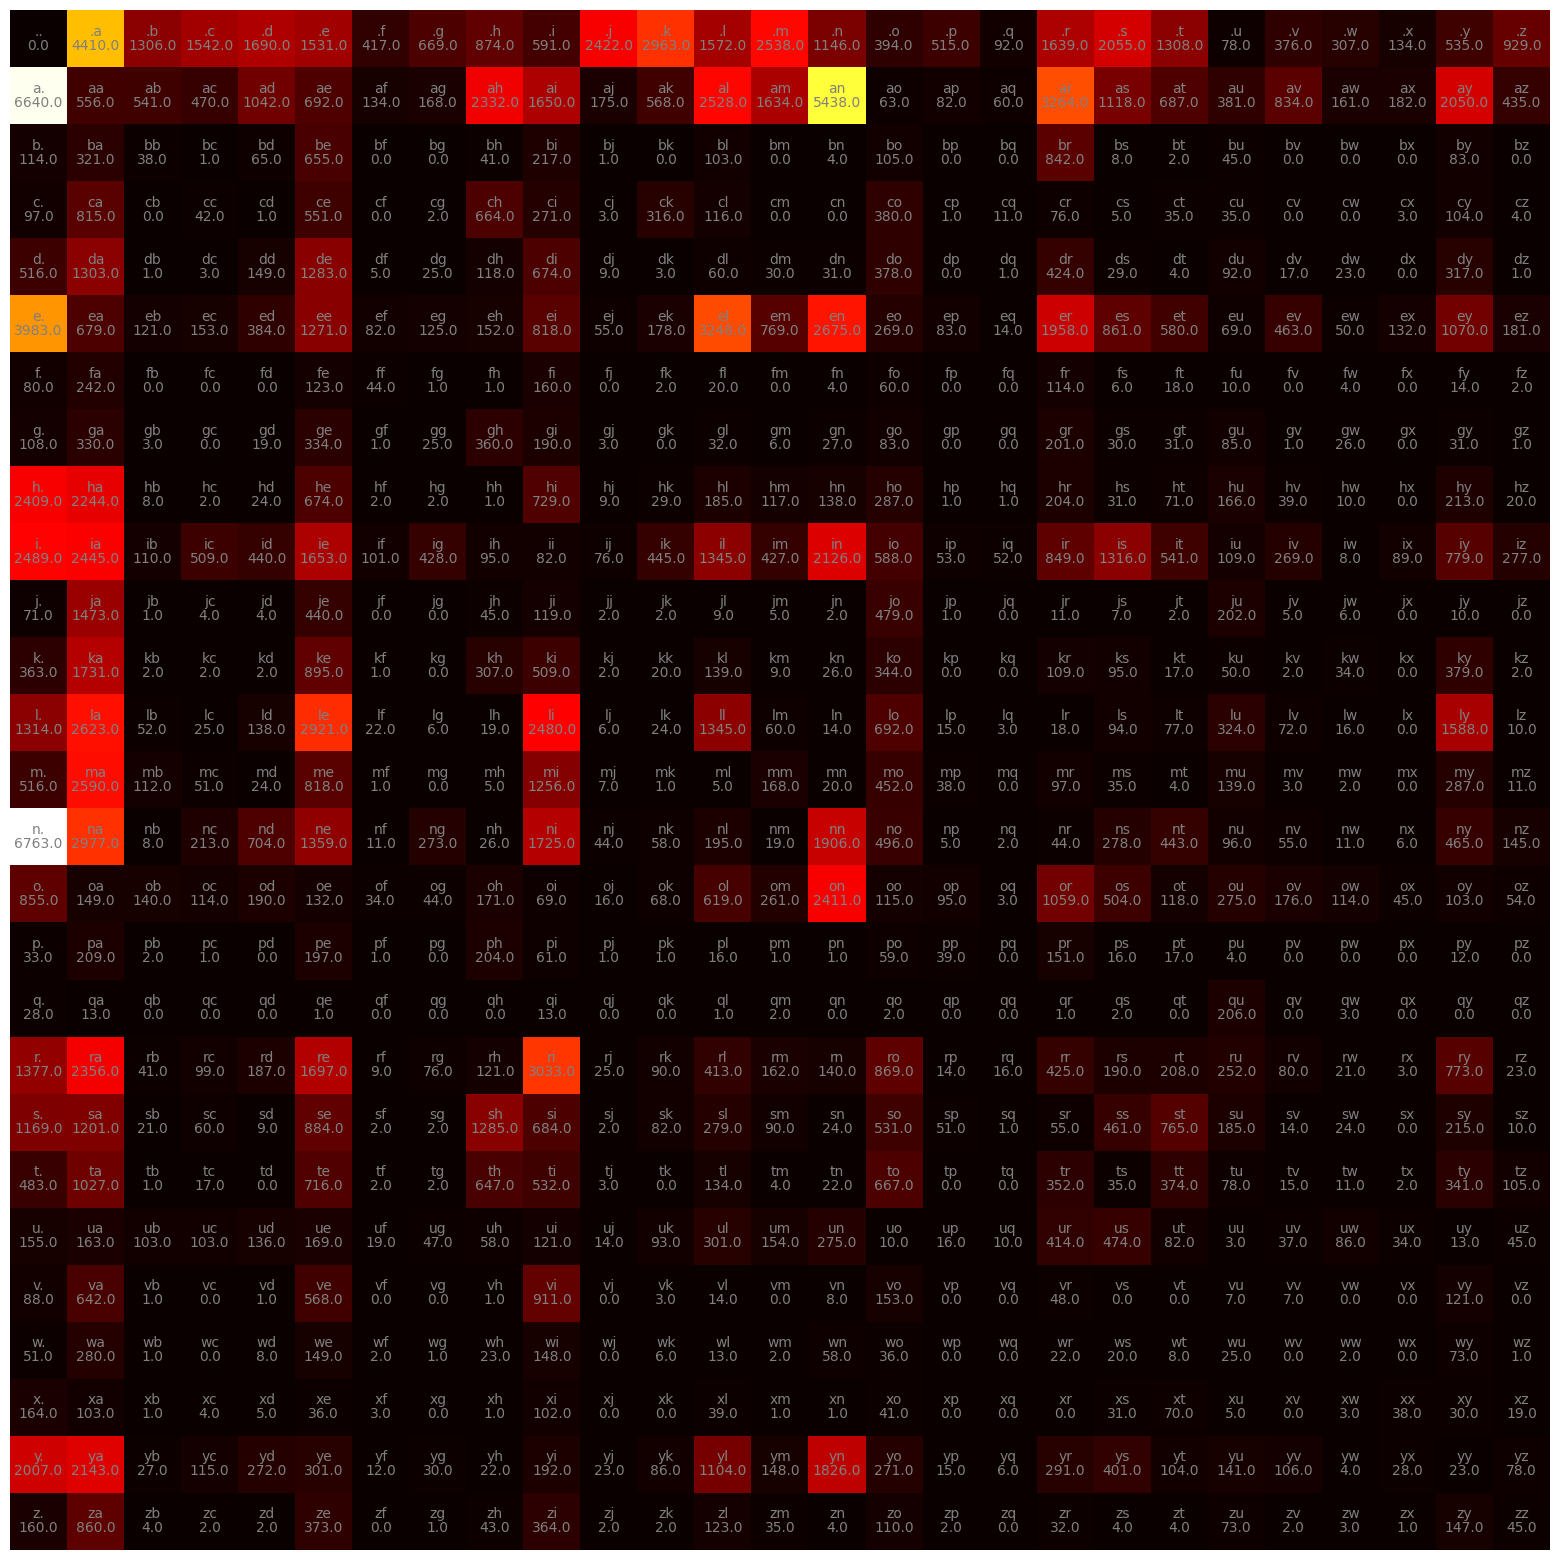

In [288]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
plt.imshow(N, cmap='hot')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i,j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [289]:
P = N.float()
P.sum(1, keepdim=True)
P = P / P.sum(1, keepdim=True)

In [290]:
g = torch.Generator().manual_seed(2147483647)


for i in range(5):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break

    out = ''.join(out)
    print(out)


junide.
janasah.
p.
cony.
a.


In [291]:
log_likelihood = 0
n= 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):        
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        log_likelihood += torch.log(P[ix1, ix2]).item()
        N[ix1, ix2] += 1
        n += 1
        # print(f"Probability of |{ch1} {ch2}| Occuring is:{P[ix1, ix2].item() * 100: .2f} % \t||  LogProb: \t{torch.log(P[ix1, ix2]).item(): .2f}")
print(f"Log Likelihood: \t\t\t{log_likelihood: .2f}")
neg_log_likelihood = -log_likelihood
print(f"Negative Log Likelihood: \t\t{neg_log_likelihood: .4f}")
print(f'Normalized Negative Log Likelihood: \t{neg_log_likelihood/n: .4f}')

Log Likelihood: 			-559873.59
Negative Log Likelihood: 		 559873.5899
Normalized Negative Log Likelihood: 	 2.4540


# Splitting code into training set

In [ ]:



for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1